## Shampoo Sales

In [1]:
# importing the general libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('shampoo-sales.csv')
dataset.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [3]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header = 0, index_col = 0, squeeze = True, parse_dates =True, date_parser = parser)
series.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [4]:
# checking for the number of observations

series.size

36

In [5]:
# descriptive statistics

print(series.describe())

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64


## Feature Engineering

In [6]:
# creating date time feature of the series

dataframe = pd.DataFrame()


dataframe['year'] = [series.index[i].year for i in range(len(series))]
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['sale'] = [series[i] for i in range(len(series))]

dataframe.head()

,year,month,day,sale
0,1901,1,1,266.0
1,1901,2,1,145.9
2,1901,3,1,183.1
3,1901,4,1,119.3
4,1901,5,1,180.3


In [7]:
# creating a lag feature for daily temperature dataset

sales = pd.DataFrame(series.values)
dataframe = pd.concat([sales.shift(1), sales], axis=1)
dataframe.columns = ['s', 's+1']
print(dataframe.head(5))

       s    s+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [8]:
# creating lag features (using the last three values)

sales = pd.DataFrame(series.values)
dataframe = pd.concat([sales.shift(3), sales.shift(2), sales.shift(1), sales], axis = 1)

dataframe.columns = ['s-2', 's-1', 's', 's+1']
print(dataframe.head(5))

     s-2    s-1      s    s+1
0    NaN    NaN    NaN  266.0
1    NaN    NaN  266.0  145.9
2    NaN  266.0  145.9  183.1
3  266.0  145.9  183.1  119.3
4  145.9  183.1  119.3  180.3


In [9]:
# creating a rolling mean feature

sales = pd.DataFrame(series.values)
shifted = sales.shift(1)
window = shifted.rolling(window=2)
means = window.mean()

dataframe = pd.concat([means, sales], axis = 1)
dataframe.columns = ['mean(s-1,s)', 's+1']
print(dataframe.head(5))

   mean(s-1,s)    s+1
0          NaN  266.0
1          NaN  145.9
2       205.95  183.1
3       164.50  119.3
4       151.20  180.3


In [10]:
# creating roling statistic features: expanding with statistics adding the min, mean, max

sales = pd.DataFrame(series.values)
width = 3
shifted = sales.shift(width - 1)
window = shifted.rolling(window = width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), sales], axis = 1)
dataframe.columns = ['min', 'mean', 'max', 's+1']
print(dataframe.head(8))

     min        mean    max    s+1
0    NaN         NaN    NaN  266.0
1    NaN         NaN    NaN  145.9
2    NaN         NaN    NaN  183.1
3    NaN         NaN    NaN  119.3
4  145.9  198.333333  266.0  180.3
5  119.3  149.433333  183.1  168.5
6  119.3  160.900000  183.1  231.8
7  119.3  156.033333  180.3  224.5


In [11]:
# creating expanding window features with statistics adding the min, mean, max

sales = pd.DataFrame(series.values)
window = sales.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), sales.shift(-1)], axis = 1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
dataframe.head()

,min,mean,max,t+1
0,266.0,266.000000,266.0,145.9
1,145.9,205.950000,266.0,183.1
2,145.9,198.333333,266.0,119.3
3,119.3,178.575000,266.0,180.3
4,119.3,178.920000,266.0,168.5


In [12]:
# upsampling the (monthly) series into days

upsampled = series.resample('D').mean()
upsampled.head(38)

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
1901-02-02      NaN
1901-02-03      NaN
1901-02-04      NaN
1901-02-05      NaN
1901-02-06      NaN
1901-02-07      NaN
Freq: D, Name: Sales, dtype: float64

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
Freq: D, Name: Sales, dtype: float64


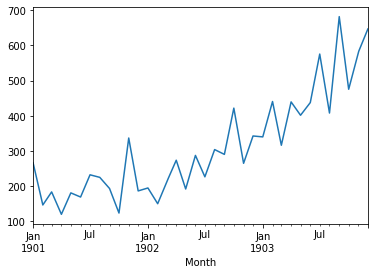

In [13]:
# upsampling to dialy interver with linear interpolator

upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method = 'linear')
print(interpolated.head(5))

# plot the lnear interpolated series

interpolated.plot()
plt.show()

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
Freq: D, Name: Sales, dtype: float64


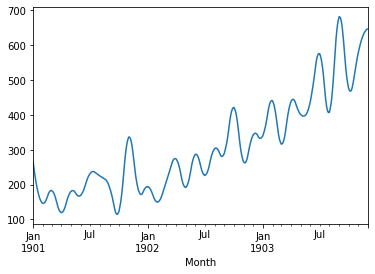

In [14]:
# interpolating the series using the using polynomia (or spline)

upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method = 'spline', order = 2)
print(interpolated.head(5))

# ploting the interpolated series
interpolated.plot()
plt.show()

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


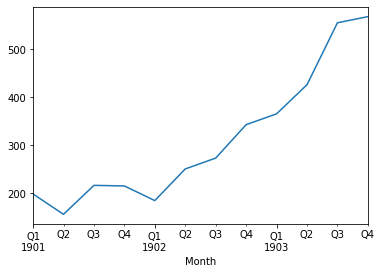

In [15]:
# Down scaling the series into quarter

quarterly_mean_sale = series.resample('Q').mean()
print(quarterly_mean_sale.head(5))

# visualizing this
quarterly_mean_sale.plot()
plt.show()

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


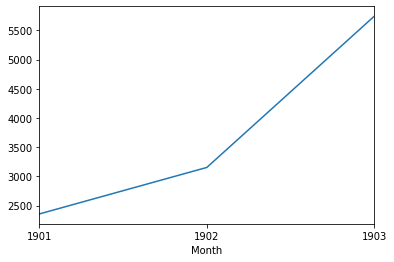

In [16]:
# downsampling the series into a yearly data

total_yearly_sale = series.resample('A').sum()
print(total_yearly_sale.head())

# vizualizing the series by yearly total sales

total_yearly_sale.plot()
plt.show()